
**รายชื่อสมาชิกในกลุ่ม** (ดับเบิลคลิกหรือดับเบิลแท็บเซลล์นี้เพื่อกรอกข้อมูล) <br>
 <font color='blue'>(พื้นที่สำหรับกรอก) </font><br/>
1. 650710076 ณัฏฐณิชา เวียงวิราศไพศาล
2. 650710592 หฤณชนก พนมวรชัย
3. 650710836 พัชราพร ภายไธสง

เป็นส่วนหนึ่งของวิชา 5177433, Deep Learning For Computer Vision, อ.ดร.ภูริวัจน์ วรวิชัยพัฒน์

## จุดประสงค์การเรียนรู้
ในแบบฝึกหัดนี้ เราจะต่อยอดจากงานที่เราทำในแบบฝึกหัดที่แล้วในสามประเด็นคือ
1. จะเริ่มใช้ Convolution Network สำหรับ classification ด้วยภาพจาก CIFAR10 ด้วย
2. ซึ่งเราจะลองทั้งแบบที่ใช้คอนโวลูชันแบบความละเอียดเดียวและแบบสองความละเอียด (มี Max Pooling กับ ไม่มี)
4. พร้อมกับทดลองปรับ setting ของโมเดล ในเรื่องของจำนวนฟีทเจอร์แม็พและจำนวนตัวอย่างในแต่ละกลุ่มย่อย (minibatch)
5. ระหว่างทางจะมีการเรียกใช้งาน visualisation tool (ตย. matplotlib หรือ plotly) ที่แสดงผลลัพธ์ของการฝึกในรูปแบบกราฟ
   เพื่อที่จะเปรียบเทียบประสิทธิภาพของแต่ละโมเดล

ในงานนี้เราจะทดลองฝึกmodelมากขึ้นให้ไปถึง 50 epochs (ตามมาตรฐานของงานยุคใหม่จะทำที่ประมาณ 200 epochs) แต่ด้วยข้อจำกัดของฮาร์ดแวร์ เราจะให้การฝึกสิ้นสุดที่ 50 epochs นั่นหมายความว่าความแม่นยำที่ได้จะยังไม่ถึงขีดจำกัดของmodelที่เราใช้ แต่นั่นก็น่าจะเพียงพอที่จะทำให้เราเห็นศักยภาพของmodelแต่ละชนิด นอกจากนี้ เราจะใช้วิธีการพล็อตกราฟในรูปแบบของ plotly

***(แต่เวลาจะพิมพ์ออกมาหรือเอาไปแปะในรายงาน คุณอาจจะพบว่า plotly ไม่ใช่ทางเลือกที่เหมาะสมก็เป็นได้)

ทั้งหมดนี้สามารถสรุปเป็นหัวข้อได้ตามประเด็นดังนี้
1. การฝึกโมเดลให้เป็นตัวพื้นฐาน(baseline) สำหรับเปรียบเทียบประสิทธิภาพ
    1. train โมเดล จากการบ้านที่แล้ว
    2. แสดงกราฟสมรรถนะด้วย plotly
    3. ปรับmodelพื้นฐานให้มีจำนวนโหนดใน hidden layer มากขึ้น
    4. เปรียบเทียบสมรรถนะของโมเดลเดิมและโมเดลที่มีจำนวนโหนดมากขึ้น
2. การใช้โครงข่ายคอนโวลูชัน
    1. การสร้างชั้นคอนโวลูชันแบบพื้นฐาน (Simple CNN)
    2. สร้างmodelที่มีการย่อรูปและซ้อนชั้นคอนโวลูชัน (Conv หลายชั้น with MaxPooling)
    3. จำนวน feature map และผลกระทบต่อความแม่นยำ
    4. จำนวนตัวอย่างในกลุ่มย่อย (minibatch) กับผลกระทบต่อความแม่นยำและระยะเวลาที่ใช้ในการฝึก

<font color="blue"> **หมายเหตุ: การบ้านนี้เป็นการบ้านที่ยาวมากๆๆ ค่อยๆคิดค่อยๆทำ ไม่ต้องกังวลจนเกินไป ควรแบ่งเวลาเพื่อทำการบ้านนี้สัก 1-2 ชม. หรือ จะทำการ save history ระหว่างทางจากนั้นดึงขึ้นมาเพื่อ plot กราฟก็ได้ สามารถใช้ [CSVlogger](https://keras.io/api/callbacks/csv_logger/) ได้**</font>


## <font color="red"><a id='p0'> งานที่ 0: งานเดิม ๆ ที่แสนสบาย, import + load CIFAR10</a></font>
เราจะเริ่มจากการ import library เดิมเข้ามาพร้อมกับโหลดฐานข้อมูล CIFAR10 ซึ่งในรอบนี้ **ขอให้อิมพอร์ต numpy มาด้วย** และ **ให้ normalize ข้อมูลรูปภาพด้วยการหาร 255.0 ไปพร้อมกันเลย** คล้ายกับเทคนิคที่แนะนำในชั้นเรียนที่บรรทัดเดียวจะแปลงทั้งชนิดข้อมูลให้เป็น float32 และ normalize (แบบ rescale ด้วยการหาร 255.0) ไปพร้อมกัน

เช่นเดิมกับที่ผ่านมา ขอให้พิมพ์เลขเวอร์ชันของ numpy, tensorflow, และ keras ออกมาด้วย และเราจะยัง import matplotlib.pyplot มาเช่นเดิม เนื่องจากเราจะใช้ทั้ง matplotlib และ plotly คู่กันในครั้งนี้ **แต่ยังไม่ต้อง import plotly เข้ามา**

In [ ]:
# [Your Work] Import modules here
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

print(np.__version__)
print(tf.__version__)
print(keras.__version__)

# [Your Work] Load CIFAR10 data into tuples
CIFAR10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = CIFAR10.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

1.26.4
2.17.0
3.4.1
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## <font color="red"><a id='p1'/> งานที่ 1: การสร้างและฝึกmodelให้เพื่อเป็นตัวพื้นฐานสำหรับเปรียบเทียบสมรรถนะ (baseline model)</font>
ในงานนี้ เราจะสร้างและฝึกmodelเชิงลำดับ (Sequential) ที่ใช้เป็นฐานในการทดสอบศักยภาพของวิธีการต่าง ๆ  ขั้นตอนการสร้างและฝึกmodelเช่นนี้จำเป็นในงานวิจัย เพราะเราจะต้องตอบคำถามให้ได้ว่าmodelที่เราสนใจนั้นดีหรือแย่กว่าmodelอื่น ๆ อย่างไร และมันจะทำให้เราประมาณความยากง่ายของปัญหาที่เราต้องการแก้ไขได้ด้วย <br>
ถ้าหาก baseline มีสมรรถนะดีกว่าหรือใกล้เคียงกับโมเดลที่เราสนใจ (ซึ่งมักจะซับซ้อนกว่า baseline model) และความแม่นยำที่ได้ยังไม่ดีนัก เราอาจจะประมาณได้ว่า ปัญหาที่เราจัดการอยู่ เป็นปัญหาที่ยากทำให้ความพยายามในการปรับปรุงmodelไม่ได้เพิ่มความแม่นยำใด ๆ ให้

ในอีกมุมหนึ่ง ถึงแม้โมเดลทั้งยากและง่ายให้ความแม่นยำที่ใกล้เคียงกัน แต่อยู่ในเกณฑ์ที่สูงมาก เช่น baseline อาจจะให้ classification accuracy ที่ 98% มาตั้งแต่แรก ส่วนการปรับแต่งให้ดีขึ้นเปลี่ยนเป็น 98.5% ถึงจะใกล้เคียงกันมาก แต่เราถือได้ว่าปัญหานี้ง่าย ซึ่งการพิจารณาว่าปัญหาเราจะง่ายหรือยากต้องอาศัยทั้งประสบการณ์และวิจารณญาณของเราประกอบกัน

ในงานนี้เราจะใช้โมเดลจากครั้งที่แล้วมาฝึกเพื่อใช้เป็น baseline model นอกจากนี้ เราจะใช้ตัวออปทิไมเซอร์แบบ built-in ภายใน keras เท่านั้นเพื่อทำให้การบันทึกmodelที่ฝึกแล้วลงในไฟล์เป็นไปโดยสะดวกมากขึ้น

### <font color="red"><a id='p1A'/>  งานที่ 1.A: นำmodelจากงาน 1.5 ในการบ้านที่แล้วมาใช้ </font>
เราเริ่มจากการนำmodelที่เรามีอยู่แล้วมาลองฝึกใหม่ให้หนักขึ้น เพื่อทึ่จะได้เห็นแนวโน้มของสมรรถนะและปัญหาต่าง ๆ ของmodelแต่ละอันที่เรานำมาทำการทดลอง

#### <font color="red"><a id='p1A1'/> งานที่ 1.A.1: สั่งสร้างmodel </font>
จงนำmodelอันสุดท้ายจากการบ้านที่แล้ว (มีชั้นซ่อนตัว 1 ชั้นและมีโหนด 200 โหนด)

In [ ]:
# [Your Work] Create a model here
model = keras.Sequential([
    keras.layers.Flatten( input_shape=(32,32,3)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### <font color="red"><a id='p1A2'/> งานที่ 1.A.2: สั่งคอมไพล์และพิมพ์สรุปโครงสร้างโมเดล</font>

จงนำmodelอันสุดท้ายจากการบ้านที่แล้ว (มีชั้นซ่อนตัว 1 ชั้นและมีโหนด 200 โหนด) มาคอมไพล์โดยใช้ optimizer เป็น Adam ที่เรียกผ่านโมดูล Keras (keras.optimizers.Adam) ใช้ loss เป็น sparse categorical cross entropy และใช้ metrics เป็น accuracy จากนั้นพิมพ์ summary ออกมาตามปรกติ

In [ ]:
# [Your Work] Create a model here
# complie
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 616,610 (2.35 MB)

 Trainable params: 616,610 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color="red"> <a id='p1A3'/> งานที่ 1.A.3: ฝึกmodelด้วย batch_size ที่เรากำหนดเองและบันทึกประวัติการฝึกลงตัวแปร </font>
ก่อนหน้านี้เราฝีกmodelโดยไม่กำหนดจำนวนตัวอย่างในแต่ละรอบย่อย (batch size) นั่นคือเราใช้ default batch_size ที่เป็น 32 ตัวอย่าง ซึ่งอาจจะมีปัญหา 2 ประการแล้วแต่กรณีดังนี้
1. ถ้าโมเดลเราซับซ้อนและใช้หน่วยความจำมาก ตัวอย่างทั้ง 32 นั้นจะใช้หน่วยความจำรวมมากเกินกว่าที่ GPU จะรับไหว ทำให้ฝึกไม่สำเร็จ
2. ถ้าโมเดลเราค่อนข้างเรียบง่าย เราอาจจะใส่ตัวอย่างลงในรอบย่อยน้อยเกินไป ทำให้การฝึกล่าช้ากว่าที่ควรจะเป็น

ในที่นี้เราจะกำหนดจำนวนตัวอย่างลงไปอย่างชัดแจ้งในแต่ละรอบย่อยให้เป็น 32 ด้วยการเพิ่มพารามิเตอร์ batch_size=32 ในตอนเรียกฟังก์ชัน fit ทั้งนี้ขอให้เก็บประวัติการฝึกไว้ในตัวแปรชื่อ h1 ทั้งนี้เราจะฝึกโมเดลไปทั้งหมด 50 รอบใหญ่ (epochs)

**หมายเหตุ** ถ้าหากเครื่องของผู้เรียนมี GPU ที่ดี (หรือใช้ colab) มันสามารถทำงานได้กับตัวอย่างจำนวน 256 หรือมากกว่านั้นก็ได้ แต่ขอให้ใช้ค่าที่กำหนดไว้ตามแบบฝึกหัด เนื่องจากเราต้องการศึกษาผลกระทบของจำนวนตัวอย่างในกลุ่มย่อย (minibatch) กับความแม่นยำของโมเดลที่ได้และความเร็วในการฝึกโมเดล


In [ ]:
# [Your Work] ฝึกโมเดลเดิม(เรียก fit) โดยที่ให้ระบุพารามิเตอร์ batch_size=32 ไปด้วย
# ใช้ตัวแปร h1 เพื่อรับ history ของการฝึกด้วย
h1 = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2834 - loss: 2.0201 - val_accuracy: 0.3675 - val_loss: 1.7648
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3738 - loss: 1.7488 - val_accuracy: 0.3779 - val_loss: 1.7332
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3994 - loss: 1.6896 - val_accuracy: 0.4095 - val_loss: 1.6577
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4059 - loss: 1.6657 - val_accuracy: 0.4074 - val_loss: 1.6482
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4167 - loss: 1.6404 - val_accuracy: 0.4248 - val_loss: 1.6077
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4219 - loss: 1.6220 - val_accuracy: 0.4034 - val_loss: 1.6499
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4301 - loss: 1.6076 - val_accuracy: 0.4257 - val_loss: 1.6093
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4312 - loss: 1.6042 - 

#### <font color="red"> <a id='p1A4'/> งานที่ 1.A.4: บันทึกโมเดลลงในไฟล์ </font>
จงบันทึกโมเดลลงในไฟล์ชื่อ 'trained_model_hw3-1_1.hdf5' (เปลี่ยนโฟลเดอร์ได้ตามต้องการ แต่ขอให้ใช้โฟลเดอร์นั้นไปตลอดในการบ้านไม่ว่าจะเป็นการบันทึกโมเดลอื่น ๆ ในข้อที่ตามมา)

**สำหรับคนที่ใช้ colab อย่าลืมทำการ mount drive ก่อน**

`from google.colab import drive` <br>
`drive.mount('/content/drive')`

In [ ]:
# [Your Work] save model
# from keras.saving import load_model
# import h5py
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/1_Deep_Learning/Homework CNN'
!dir

model.save('trained_model.hdf5')

Mounted at /content/drive
/content/drive/MyDrive/1_Deep_Learning/Homework CNN
CNN\ on\ CIFAR10\ Workbook.ipynb  temp-plot.html  trained_model.hdf5  trained_model_hw3-1_2.hdf5


### <font color="red"><a id='p1B'/> งานที่ 1.B: แสดงกราฟสมรรถนะด้วย plotly </font>
ตัว plotly นั้นมีความสามารถในการวาดกราฟแบบ interactive ทำให้เราสามารถเลื่อนเมาส์ไปบนกราฟเพื่ออ่านค่าบนกราฟได้ ที่สำคัญเราสามารถหดหรือขยายการแสดงผลเพื่อให้ได้มุมมองที่ตรงกับความต้องการของเรามากขึ้นด้วย

แต่ก่อนที่จะใช้ plotly เราจะเริ่มจากการวาดกราฟด้วย matplotlib อีกครั้งเพื่อที่จะทำให้เราเห็นความแตกต่างของการวาดกราฟทั้งสองแบบได้ง่ายขึ้น

#### <font color="red"><a id='p1B1'/> งานที่ 1.B.1: วาดกราฟด้วย matplotlib </font>
จงวาดกราฟเพื่อเปรียบเทียบค่าความแม่นยำจากชุดข้อมูลฝึกและชุดข้อมูลทดสอบ (accuracy และ val_accuracy) ด้วย matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


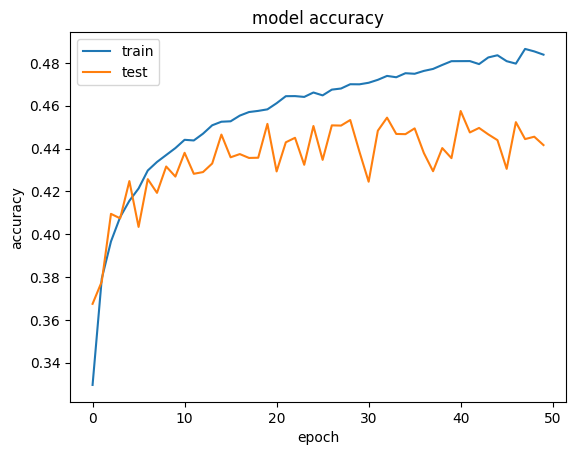

In [ ]:
# [Your Work] plot accuracy history of both training and test sets.
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <font color="red"><a id='p1B2'/> งานที่ 1.B.2: อิมพอร์ต plotly พร้อมแสดงเลขเวอร์ชัน </font>
จงอิมพอร์ต plotly
และพิมพ์ plotly.__version__ ออกมาด้วย

หมายเหตุ: หากใครที่ใช้ colab ไม่ต้องลบฟังก์ชันที่ให้มา

In [ ]:
# [Your Work] Import plotly and related sub-modules
import plotly

print(plotly.__version__)

'''for Colab user'''
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

5.24.1


#### <font color="red"><a id='p1B3'/> งานที่ 1.B.3: เชื่อมโน้ตบุ๊คกับ plotly </font>
ลองค้นดูตัวอย่างการใช้ init_notebook_mode จากตัวอย่างในชั้นเรียนหรืออินเตอร์เน็ต เพื่อศึกษาการใช้ฟังก์ชัน init_notebook_mode ในการเชื่อมต่อกับโน้ตบุ๊ค <br>***<font color="blue">(แนะนำให้ค้นดูตัวอย่างสัปดาห์ที่ 4, 5 ในโน้ตบุ๊คชื่อทำนองนี้ 'Convolution x 2 + Dense 64 + Dropout x 3 + Norm + plotly')</font>***

In [ ]:
# [Your Work] ให้ทำการ init_notebook_mode แบบให้มันเชื่อมกับ plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
history = h1

#### <font color="red"><a id='p1B4'/> งานที่ 1.B.4: เตรียม numpy array สำหรับแกน x </font>
สืบเนื่องจาก plotly นั้นยืดหยุ่นมาก เราจึงต้องระบุด้วยว่าอยากให้ค่าในแกน x ของเรามีอะไรบ้าง ซึ่งในที่นี้เราต้องการให้เป็น 1, 2, 3, ..., 50 เพราะเราฝึกโมเดล 50 รอบ

อย่างไรก็ตาม หากเราระบุเลข 50 ลงไปตรง ๆ ตอนสร้างอาเรย์ที่ไล่ค่าขึ้นไปเช่นนั้น เวลาที่เราเปลี่ยนจำนวนรอบการฝึก เราจะต้องมาคอยแก้โค้ดตอนวาดกราฟด้วย ทำให้มีโอกาสผิดพลาดได้ง่าย  เพื่อแก้ปัญหานี้ เราจะสกัดเอาจำนวน epochs ที่ฝึก ด้วยการถามถึงความยาวของลิสต์ที่บันทึกประวัติการฝึก ซึ่งลิสต์นั้นก็คือ h1.history['accuracy'] แล้วเก็บไว้ในตัวแปรชื่อ num_epochs

จากนั้นเราจะสร้างอาเรย์ที่มีค่าเป็น 1, 2, 3, ..., 50 แล้วเก็บไว้ในตัวแปรชื่อ epochs_x ซึ่งทำได้ด้วยฟังก์ชัน linspace ของโมดูล numpy ซึ่งเรามักจะเขียนว่า np.linspace(1, num_epochs)

In [ ]:
# [Your Work]
num_epochs =  len(h1.history['accuracy']) # ..เอา history ของ accuracy จาก h1 มาถามหาความยาวด้วย len ...
epochs_x =  np.linspace(1, num_epochs) # แปลงจำนวนให้กลายเป็นอาเรย์ที่ไล่ตัวเลขขึ้นไปตรง ๆ คำตอบอยู่ตรงคำอธิบายข้างบนแล้ว ลองอ่านดู

#### <font color="red"><a id='p1B5'/> งานที่ 1.B.5: ตรวจสอบความถูกต้องของ epochs_x </font>
เมื่อใดก็ตามที่เรากำลังใช้ฟังก์ชันหรือวิธีการที่เราไม่คุ้นเคย เราควรจะระวังตัวเป็นพิเศษ และคอยสังเกตว่าค่าที่อยู่ข้างในตัวแปรสำคัญนั้นตรงตามที่เราคาดหวังไว้หรือไม่ ซี่งในที่นี้เราจะพิมพ์ค่า epochs_x ออกมา

ซึ่งวิธีพิมพ์นั้น ไม่ต้องอาศัยฟังก์ชัน print ก็ได้ แต่ให้อ้างถึงตัวแปรที่เราสนใจตรง ๆ ด้วยการเขียนชื่อมันแล้วรันดูผลลได้เลย (ทำได้ในกรณีเป็นบรรทัดสุดท้ายเท่านั้นนะ)

จงเรียกชื่อตัวแปร epochs_x เพื่อแสดงค่าที่อยู่ข้างใน epochs_x ออกมา พร้อมสังเกตด้วยว่ามันมีค่าตรงตามที่เราต้องการจริงหรือไม่ ถ้าตรงจริง มันจะได้ค่าออกมาเป็น 1., 2., ..., 50. ซึ่งแสดงถึง epochs หมายเลข 1 ถึง 50 ที่เราฝึกเครื่องไปนั่นเอง
<BR>**ขอย้ำอีกครั้งว่าการค่อย ๆ ตรวจสอบความถูกต้องของข้อมูลทีละส่วนอย่างแข็งขันเป็นเรื่องที่สำคัญมากในวิทยาการข้อมูล**

In [ ]:
# [Your Work, just print the value of epochs_x to the notebook]
epochs_x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

#### <font color="red"><a id='p1B6'/> งานที่ 1.B.6: เซ็ตค่าสำหรับกราฟความแม่นยำ </font>
เช่นเดียวกับ matplotlib เราต้องเซ็ตค่าของกราฟที่เราจะวาดก่อน ซึ่งตัว plotly นั้นจะมีการเซ็ตที่มักจะยาวกว่าของ matplotlib แต่อาจจะดูเป็นระเบียบกว่า เนื่องจากเป็นการเซ็ตค่าของแต่ละเส้นที่ต้องการวาดแยกออกมาเป็นอิสระออกจากกัน ในขณะที่ matplotlib จะเน้นไปที่การเซ็ตเส้นกราฟทุกอันลงที่ตัว plt โดยตรง

**ploty นั้นละเอียด setting ได้เยอะกว่า**

กล่าวคือ plotly จะแยกการเซ็ตกราฟแต่ละเส้นออกมาเตรียมไว้ก่อนในตัวแปรของเส้นกราฟ ซึ่งถ้ามี 10 เส้นก็จะมี 10 ตัวแปร แล้วจึงนำเส้นกราฟไปรวมกันตอนวาด แต่ matplotlib จะเน้นที่การเซ็ตค่าลงในกราฟโดยตรง  วิธีของ plotly จะทำให้การวาดกราฟที่ซับซ้อนดูมีระเบียบขึ้น และสามารถนำเส้นกราฟอันเดียวไปใช้อีกรอบในกราฟอื่น ๆ ได้ง่ายเนื่องจากเป็นตัวแปรที่แยกอิสระต่อกัน

setting เส้นกราฟ
1. จงเซ็ตค่าเส้นกราฟ accuracy ของชุด train โดยตั้งชื่อ (name="train") และใช้โหมด mode='lines_markers' และเก็บการเซ็ตกราฟเส้นนี้ไว้ในตัวแปร train_acc_trace1
2. จากนั้นให้ทำแบบเดียวกันกับเส้นกราฟชุดข้อมูลทดสอบ val_accuracy แต่ให้ใช้ชื่อ (name="test") และเก็บไว้ในตัวแปร test_acc_trace1

In [ ]:
# [ํYour Work 1: create train_acc_trace1 from go.Scatter with x = epochs_x and y = h1.history['accuracy']]
import plotly.graph_objs as go
from plotly.offline import iplot

train_acc_trace1 = go.Scatter(
    x = epochs_x,
    y = h1.history['accuracy'],
    mode = 'lines+markers',
    name = 'train'
)

# [Your Work 2: similar with the above, but in the context of test-acc_trace1]
test_acc_trace1 = go.Scatter(
    x = epochs_x,
    y = h1.history['val_accuracy'],
    mode = 'lines+markers',
    name = 'test'
)


#### <font color="red"> <a id='p1B6'/> งานที่ 1.B.6: แพ็คเส้นกราฟเข้าด้วยกันในลิสต์แล้ววาดออกมา </font>
หลังจากที่เตรียมการอยู่นาน ในตอนนี้เราพร้อมวาดกราฟใน plotly แล้ว ซึ่งตามแนวปฏิบัติพื้นฐานของ plotly เราจะสร้างลิสต์ที่เก็บเส้นกราฟทั้งหมดไว้ด้วยกัน จากนั้นเราจะเรียกฟังก์ชัน iplot ที่เราอิมพอร์ตเข้ามากับลิสต์ดังกล่าว  แม้ว่าเราจะสามารถสร้างลิสต์ขึ้นมาในขณะที่ส่งมันไปเป็นพารามิเตอร์ของ iplot ได้เลย แต่ในแบบฝึกหัดนี้ เราจะพักการสร้างลิสต์ลงในตัวแปรก่อน จากนั้นจึงส่งตัวแปรนั้นไปที่ iplot

จงสร้างลิสต์ที่ข้างในมี train_acc_trace1 และ test_acc_trace1 แล้วเก็บลิสต์นี้ไว้ในตัวแปรชื่อ acc_data1 จากนั้นให้ส่ง acc_data1 ไปเป็นพารามิเตอร์ของ iplot  โค้ดที่คุณควรเขียนในเซลล์ข้างล่างนี้ควรมีสองบรรทัด (ในแต่ละ Step มีหนึ่งบรรทัด)

**หมายเหตุ** ตัวกราฟที่ได้เป็นแบบอินเตอร์แอคทิฟ เราควรจะลองเอาเมาส์ลากผ่านไปมาบนตัวกราฟเพื่อสังเกตพฤติกรรมของมันดู

In [ ]:
# [ํYour Work]
configure_plotly_browser_state()
# Step 1: create list, acc_data1 = [setting กราฟที่ 1, setting กราฟที่ 2]
acc_data1 = [train_acc_trace1, test_acc_trace1]

# Step 2: send acc_data1 to iplot, you shold get a plotly diagram here.
iplot(acc_data1)

#### <font color="red">  <a id='p1B7'/> งานที่ 1.B.7: ลดบรรทัดลง สร้างลิสต์ตรงวงเล็บของ iplot แล้วส่งเป็นพารามิเตอร์ทันที </font>
ในโค้ดส่วนที่แล้ว เราสร้างลิสต์แล้วพักลงตัวแปรก่อน ทำให้โค้ดมีสองบรรทัด แต่ที่จริงเราสามารถยุบรวมให้เหลือบรรทัดเดียวได้ โดยการสร้างลิสต์ในวงเล็บสำหรับการส่งพารามิเตอร์

จงพล็อตกราฟเดิม โดยการสร้างลิสต์ในวงเล็บสำหรับการส่งพารามิเตอร์ (อย่าสร้างตัวแปรขึ้นมา ให้สร้างลิสต์ไว้ในวงเล็บของ iplot โดยตรง) โค้ดของคุณควรจะมีเพียงบรรทัดเดียวและไม่มีการอ้างถึง acc_data1 แต่อย่างใด ซึ่ง <br>
โค้ดคุณจะอยู่ในรูป iplot( [setting กราฟที่ 1, setting กราฟที่ 2], ... ) ทำนองนี้

**หมายเหตุ** ปรกติแล้ว สำหรับลิสต์ใดที่เราจะใช้ครั้งเดียวแล้วไม่ใช้อีก เรามักจะใช้วิธีสร้างและใช้ทันทีในบรรทัดเดียวกันแบบงานนี้ เพื่อให้ได้โค้ดที่กระชับและไม่มีตัวแปรมากมายให้เครื่องต้องเก็บไว้ในหน่วยความจำมากกว่าที่จำเป็น

In [ ]:
# [ํYour Work]
configure_plotly_browser_state() # for Colab user
iplot([train_acc_trace1, test_acc_trace1])

### <font color="red"> <a id='p1C'/> งานที่ 1.C: เพิ่มจำนวนโหนดในชั้นซ่อนตัว </font>
เราจะทดลองเพิ่มจำนวนโหนดใน hidden layer ให้เป็น 500 และเลือกอันที่มีความแม่นยำสูงกว่า (ระหว่างแบบ 200 กับ 500 โหนด) มาให้เป็น baseline  ซึ่งคำว่ามีความแม่นยำสูงกว่านี้ควรมาจากความแม่นยำใน test set (val_accuracy) ไม่อย่างนั้นแล้วโมเดลที่มี 'ความจุ' ด้านความจำสูงกว่าจะมีแนวโน้มเป็นฝ่ายชนะใน training set เกือบทุกครั้ง แม้ว่าจะมีประโยชน์น้อยกว่าในทางปฏิบัติก็ตาม

#### <font color="red"> <a id='p1C1'/> งานที่ 1.C.1: ปรับโมเดลให้มีโหนดในชั้นซ่อนตัว 500 โหนด </font>
จงนำโมเดลจากข้อ 1.A.1 มาเพิ่มจำนวนโหนดในชั้นซ่อนตัวให้มี 500 โหนด

ควรเก็บโมเดลนี้ไว้ในตัวแปร model2

In [ ]:
# [Your Work] Create a model here
model2 = keras.Sequential([
    keras.layers.Flatten( input_shape=(32,32,3)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



#### <font color="red"> <a id='p1C2'/> งานที่ 1.C.2: คอมไพล์โมเดลและพิมพ์ summary </font>
จงนำโมเดลที่สร้างใหม่มาคอมไพล์และสั่งพิมพ์สรุปด้วยฟังก์ชัน summary()

In [ ]:
# [Your Work] (Just run this one)
# complie
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │       1,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541,510 (5.88 MB)

 Trainable params: 1,541,510 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color="red"> <a id='p1C3'/> งานที่ 1.C.3: ฝึกโมเดลอันใหม่</font>
เอาล่ะ มาลองฝึกโมเดลด้วยคำสั่ง fit กันอีกรอบ จะได้เห็นว่าการเพิ่มจำนวนโหนดในชั้นซ่อนตัวเช่นนี้จะช่วยให้เราได้โมเดลที่ดีขึ้นหรือไม่ ทั้งนี้ให้เก็บประวัติการฝึก model2 ลงในตัวแปรชื่อ h2

In [ ]:
# [Your Work] fit a model with train images and labels for 50 epochs
h2 = model2 .fit(train_images, train_labels, epochs=50, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2874 - loss: 2.0958 - val_accuracy: 0.3945 - val_loss: 1.6913
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3835 - loss: 1.7135 - val_accuracy: 0.4191 - val_loss: 1.6253
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4185 - loss: 1.6313 - val_accuracy: 0.3976 - val_loss: 1.6577
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4263 - loss: 1.5995 - val_accuracy: 0.4243 - val_loss: 1.5963
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4427 - loss: 1.5656 - val_accuracy: 0.4358 - val_loss: 1.5627
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4532 - loss: 1.5366 - val_accuracy: 0.4396 - val_loss: 1.5564
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4583 - loss: 1.5122 - val_accuracy: 0.4497 - val_loss: 1.5477
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4661 - loss: 1.4977 -

#### <font color="red"> <a id='p1C4'/> งานที่ 1.C.4: สั่งบันทึกโมเดล </font>
ให้ใช้เซลล์ด้านล่างนี้เพื่อบันทึกโมเดลลงในไฟล์ชื่อ 'trained_model_hw3-1_2.hdf5'

In [ ]:
# [Your Work]
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/1_Deep_Learning/Homework CNN'
!dir

model.save('trained_model_hw3-1_2.hdf5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/1_Deep_Learning/Homework CNN
CNN\ on\ CIFAR10\ Workbook.ipynb  temp-plot.html  trained_model.hdf5  trained_model_hw3-1_2.hdf5


### <font color="red"> <a id='p1D'/> งานที่ 1.D: เปรียบเทียบสมรรถนะของโมเดลด้วย plotly </font>
เรามีประวัติการฝึกและทดสอบโมเดลด้วย test set ในตัวแปร h1 และ h2 แล้ว เราสามารถนำข้อมูลทั้งสองชุดมาวาดลงในกราฟเดียวกันเพื่อให้ง่ายต่อการเปรียบเทียบแบบ side-by-side ได้  วิธีนี้เป็นที่นิยมในงานวิจัยที่เราต้องการเปรียบเทียบว่าโมเดลสองตัว (หรือมากกว่านั้นก็ได้) มีความแม่นยำแตกต่างกันเพียงใด

#### <font color="red"> <a id='p1D1'/> งานที่ 1.D.1: สร้างตัวแปรเก็บข้อมูลการฝึกโมเดลจาก h2 </font>
ก่อนหน้านี้เรามีข้อมูลกราฟของ h1 ในตัวแปรชื่อ train_acc_trace1 และ test_acc_trace1 แล้ว เราจะทำแบบเดียวกันกับการเก็บข้อมูลกราฟของ h2 เพียงแต่เปลี่ยนชื่อเป็นชื่อ train_acc_trace2 และ test_acc_trace2 และเปลี่ยนชื่อ (name) ของเส้นกราฟเป็น train 2 และ test 2 ด้วย

**หมายเหตุ** ความหมายตรงนี้คือ ก่อนหน้าเราเคยเขียนว่า y = h1.???
<BR> ตอนนี้เราจะสร้าง train_acc_trace2 และ test_acc_trace2 โดยใช้ y = h2.??? มาเป็นข้อมูลแกน y แทนอันเดิมที่ใช้ข้อมูลจาก h1 และเราต้องปรับชื่อของตัวเส้นกราฟให้เรียบร้อยด้วย อย่าปล่อยให้ name มันเป็นอันเดิม

In [ ]:
# [ํYour Work]
import plotly.graph_objs as go
from plotly.offline import iplot

# [Your Work 2: similar with the above, but in the context of test-acc_trace1]
train_acc_trace2 = go.Scatter(
    x = epochs_x,
    y = h2.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train 2'
)

test_acc_trace2 = go.Scatter(
    x = epochs_x,
    y = h2.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test 2'
)

#### <font color="red"> <a id='p1D2'/> งานที่ 1.D.2 พล็อตกราฟ 4 เส้นจากสองโมเดลในผังเดียวกัน </font>
ในกรณีนี้ เราอยากเทียบสมรรถนะของโมเดลทั้งสองควบคู่กันไปทั้งในตอนฝึกและตอนทดสอบ ดังนั้นเราจะพล็อต train_acc_trace1, train_acc_trace2, test_acc_trace1, test_acc_trace2 ไว้ด้วยกันในผังเดียว

เรียกคำสั่ง iplot นั่นเอง

In [ ]:
# [Your Work]
configure_plotly_browser_state() # for Colab user
iplot([train_acc_trace1, train_acc_trace2, test_acc_trace1, test_acc_trace2])

### <font color="red"> <a id='q1D'/> Quick Quiz 1.D: สมรรถนะของการฝึกและทดสอบในโมเดล </font>
มีประเด็นที่เราควรสังเกตและตอบออกมาทางพื้นที่ด้านล่างดังนี้
1. ในตอน train model, ตัว 500-node ทำได้ดีกว่าตัว 200-node อย่างคงเส้นคงวาหรือไม่
2. ในตอน test model, ตัว 500-node ทำได้ดีกว่าตัว 200-node อย่างคงเส้นคงวาหรือไม่ (ดูที่ val_accuracy)
3. คำตอบในข้อ 1 และ 2 ขัดกันหรือสอดคล้องกัน จงให้เหตุผลสนับสนุนว่าทำไมจึงเป็นเช่นนั้น

<font color="blue"> **(พื้นที่สำหรับเติมคำตอบ ดับเบิลคลิกเพื่อเติมคำตอบเช่นเดียวกับการบ้านที่แล้ว)** </font>

1. ในตอน train model, ตัว 500-node ทำได้ดีกว่าตัว 200-node อย่างคงเส้นคงวา
2. ในตอน test model, ตัว 500-node ทำได้ดีกว่าตัว 200-node ไม่คงเส้นคงว่า
3. สอดคล้องกัน เพราะ ตัว 500-node อาจทำได้ดีกว่า 200-node ในการ train เนื่องจากมีความสามารถในการเรียนรู้ที่ซับซ้อนมากขึ้น แต่ในการ test มีประสิทธิภาพไม่คงที่ และเกิดปัญหา overfitting




## <font color="red"> <a id='p2'/> งานที่ 2: การใช้โครงข่ายคอนโวลูชัน </font>
แม้เราจะเพิ่มจำนวนโหนดในชั้นซ่อนตัว (hidden layer) ไปแล้ว แต่ความแม่นยำที่ได้ก็ใช่ว่าจะดูดี นั่นอาจเป็นเพราะเราเลือกใช้ชั้นแบบเชื่อมต่อสมบูรณ์ (fully connected layer หรือ dense layer) ในขณะที่ชั้นแบบคอนโวลูชัน (convolutional layer) อาจจะให้ผลดีที่ดีกว่าเพราะมีความสอดคล้องกับประสาทด้านการมองเห็นของมนุษย์มากกว่า ดังนั้นเราจะมาลองใช้โมเดลที่มีชั้นคอนโวลูชันเพื่อศึกษาสมรรถนะของมันตามประเด็นข้างล่างต่อไปนี้

1. แบบชั้นเดียว
2. แบบสองชั้น
3. ทดลองเปลี่ยนจำนวน feature maps (kernels) เพื่อสังเกตความเปลี่ยนแปลงเรื่องความแม่นยำ
4. ทดลองเปลี่ยนจำนวนภาพในกลุ่มย่อย (minibatch) เพื่อสังเกตความเปลี่ยนแปลงเรื่องความแม่นยำและเวลาที่ใช้ในการฝึก

### <font color="red"> งานที่ 2.A: การสร้างชั้นคอนโวลูชันแบบพื้นฐาน </font>

สิ่งที่สำคัญมากในการใช้ชั้นคอนโวลูชันคือการเลือกขนาดของตัวกรอง (filter) และจำนวนฟีทเจอร์แม็พ ซึ่งในที่นี้เราจะเลือกใช้ตัวกรองขนาดเล็กคือ 3x3 และมีจำนวนฟีทเจอร์แม็พ 16 อัน ส่วนฟังก์ชันแอ็คติเวชันยังคงเลือกใช้ relu เช่นเดิม ซึ่งการใช้ชั้นคอนโวลูชันนี้ เรามักจะไม่ใช้เป็นชั้นสุดท้ายที่ให้ผลลัพธ์ แต่เราจะนำชั้นแบบ Dense ที่มีจำนวนโหนดเท่ากับจำนวนคลาสมาเป็นชั้นผลลัพธ์แทน

อย่างไรก็ตาม เราไม่สามารถเชื่อมชั้นคอนโวลูชันเข้ากับชั้นแบบ Dense ได้โดยตรง เราจะเอาชั้นแบบ Flatten มาคั่นก่อน กล่าวคือ

โมเดลของเรามี
1. ชั้นแรกเป็นแบบ Conv2D, มี activation เป็น relu, มี input_shape เป็น (32, 32, 3), มีขนาดฟิลเตอร์เป็น (3, 3) และมีจำนวนฟีทเจอร์แม็พเป็น 16
2. ชั้นที่สองเป็นชั้นปรับรูปร่างให้เป็นเวคเตอร์เดี่ยว (Flatten)
3. ชั้นผลลัพธ์ (ชั้นที่สาม) เป็นแบบ Dense มี 10 โหนด และใช้ softmax (หยิบของเดิมมาใช้ได้)
   
**หมายเหตุ** ดูตัวอย่างได้จากเนื้อหาจากโค้ดในคาบเรียนได้ อันนี้แทบจะเหมือนกับที่เราเรียนมาก่อนหน้า แต่จะไม่เหมือนทุกประการ ต้องอ่าน spec ของโครงข่ายด้านบนแล้วเราเชื่อมโยงความหมายลงไปที่ตัวโค้ดและแก้ไขให้ตรงกับสิ่งที่ระบุไว้ในที่นี้ได้หรือไม่

In [ ]:
# [Your Work]
model3 = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(32,32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



ต่อด้วยการคอมไพล์และพิมพ์สรุปทันทีเช่นเดิม **ซึ่งตอนนี้อยากให้เราทุกคนอธิบายตัวเราได้แล้วว่าคำว่า optimizer, loss, และ metrics คืออะไร** ถ้าแต่ก่อน copy มาเฉย ๆ ตอนนี้ต้องอธิบายให้ได้แล้วว่ามันคืออะไร

In [ ]:
# [Your Work]
model3.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │         144,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,458 (564.29 KB)

 Trainable params: 144,458 (564.29 KB)

 Non-trainable params: 0 (0.00 B)

<font color="blue"> **(พื้นที่สำหรับตอบควิซข้างบน)**</font>
1. optimiser คือ ตัวที่คอยปรับจูนโมเดล เพื่อให้มีค่า loss ของโมเดลมีค่าน้อยลง
2. loss คือ ค่าความผิดพลาดระหว่างค่าที่โมเดล Predict กับ Ground Truth
3. metrics คือ ตัวกำหนดวิธีที่ใช้วัดประสิทธิภาพของโมเดล (เลือก Acc.)

### <font color="red">  <a id='q2A'/> Quick Quiz 2.A: อินพุตและเอาต์พุตจากชั้น Conv2D ที่เราสร้างขึ้นมา </font>
1. จงระบุว่า input ที่เข้าไปที่ชั้น Conv2D มีขนาดเป็นเท่าไหร่(กว้างxยาว) ทั้งนี้ให้บอกจำนวนแชนเนลด้วย และขนาดของผลลัพธ์จากชั้น Conv2D นี้มีขนาดเท่าไหร่ (ดูได้จาก summary()) และให้บอกด้วยว่าจำนวนแชนเนลของตัวอย่างใน output นี้มีค่าเท่าไหร่
2. คำว่า None ใน summary ที่เห็นตรงคอลัมน์ Output Shape หมายถึงอะไร ทำไมต้องเป็น None (แนะนำลองค้นหาใน Google ดูประมาณว่า "why keras model give None shape")

<font color="blue"> **(พื้นที่สำหรับตอบควิซข้างบน)**</font>

คำตอบของข้อ 1: <br>
Ref.: https://medium.com/@ravi0dubey/parameter-calculation-in-cnn-module-a4eec4841396

`**Output shape Parameter: (batchSize, Height, Width, Channels)**`

HxW = 30x30 --> ดูจาก Output Shape

Channel = 16 --> ดูจาก Output Shape

Result = 448 --> ดูจาก Param # ของ Layer conv2d (Conv2D)

- อธิบายคำตอบมาด้วยว่าดูจากตรงไหน summaryบรรทัดชื่อว่าอะไร? หรือ ตัวแปรอะไร?**(ที่เขียนไว้ตรงนี้เป็น guidelines ในการตอบคำถาม จะได้ตอบตรงประเด็นที่ผมสนใจอยากให้คุณเรียนรู้)**

คำตอบของข้อ 2: <br>

Ref.: https://stackoverflow.com/questions/60723026/what-is-the-meaning-of-none-in-tensorflow-keras-model

ค่าที่เป็น None คือค่า Batch Size หรือก็คือจำนวนตัวอย่างข้อมูลที่ใช้ในการคำนวณและปรับปรุงน้ำหนักของโมเดลในแต่ละรอบ
เช่น ชุดฝึกมี 500 กำหนด batch size = 32
ในแต่ละรอบการฝึกจะดึงเอาชุดฝึกมา 32 และจะทำทั้งหมด 500/32 = 15.625 รอบ หรือเป็นเลขกลม ๆ ก็ 16 รอบในการฝึก 1 epoch เมื่อทำจนครบจะคำนวณและปรับปรุงน้ำหนักของโมเดลออกมา

การกำหนดค่าของ Batch Size เป็น None หมายความว่าเราสามารถแก้ไขค่า batch_size ตอนฝึกโมเดลใน method fit() ได้ตามที่ต้องการในแต่ละรอบการฝึก

- อธิบายทั้งตรงความหมาย และเหตุผลด้วยว่าทำไมต้องเป็น None อยากทราบว่าอ่านหรือศึกษามาจาก url อะไรด้วย
(ในกรณีที่ตอบไม่ได้ ให้เขียนมาด้วยว่าตอบไม่ได้)

คราวนี้เราจะฝึกโมเดลแล้ว(เรียก fit) แต่เพื่อความรวดเร็วเราจะฝึกเพียงแค่ 40 epoch และเพื่อให้ง่ายต่อการเก็บผลลัพธ์มาเปรียบเทียบ เราจะเก็บประวัติการฝึกไว้ในตัวแปร h3

In [ ]:
# [Your Work] fit a model with train images and labels for 20 epochs
h3 = model3 .fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4114 - loss: 1.6652 - val_accuracy: 0.5358 - val_loss: 1.3236
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5806 - loss: 1.2184 - val_accuracy: 0.5545 - val_loss: 1.2727
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6198 - loss: 1.1040 - val_accuracy: 0.5864 - val_loss: 1.1991
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6510 - loss: 1.0167 - val_accuracy: 0.5872 - val_loss: 1.2104
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6772 - loss: 0.9490 - val_accuracy: 0.5815 - val_loss: 1.2339
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6980 - loss: 0.8835 - val_accuracy: 0.5881 - val_loss: 1.2126
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7137 - loss: 0.8391 - val_accuracy: 0.5948 - val_loss: 1.2067
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7256 - loss: 0.8060 - 

### <font color="red"> <a id='p2B'/> งานที่ 2.B: สร้างโมเดลที่มีการย่อรูปและซ้อนชั้นคอนโวลูชัน </font>
เนื่องจากสายตาของมนุษย์มีการพิจารณาภาพทั้งในระดับหยาบและละเอียด ซึ่งข้อมูลในทั้งสองระดับอาจจะมีความสำคัญทั้งคู่สำหรับการจำแนกวัตถุ ทำให้เราจะย่อ feature map จากการทำคอนโวลูชันในชั้นแรกก่อนด้วยการทำ Max Pooling แล้วจึงเรียกใช้ชั้นคอนโวลูชันอีกอัน นอกจากนี้เราจะทดสอบการใช้พารามิเตอร์ padding='same' ในชั้นคอนโวลูชันอันแรกด้วย

สรุปแล้วโครงสร้างของโมเดลที่เราต้องการคือ
1. โมเดลของเรามีชั้นแรกยังเหมือนเดิม **เพิ่มเติมคือพารามิเตอร์ padding='same'**
2. ชั้นที่สองเป็นชั้น keras.layers.MaxPooling2D (ใช้พารามิเตอร์แบบดีฟอลต์ได้ คือใช้วงเล็บเปล่าในการระบุพารามิเตอร์)
3. ชั้นที่สามเป็นชั้นคอนโวลูชัน กำหนดให้พารามิเตอร์เหมือนชั้นแรก ยกเว้นจำนวนฟีทเจอร์แม็พให้เพิ่มเป็น **32 อัน** และใช้ padding='same' เช่นกัน
4. ชั้นที่สี่เป็นชั้นปรับรูปร่างให้เป็นเวคเตอร์เดี่ยว (Flatten)
3. ชั้นผลลัพธ์ (ชั้นที่ห้า) เป็นแบบ Dense มี 10 โหนด และใช้ softmax (หยิบของเดิมมาใช้ได้)

**หมายเหตุ 1** เราไม่จำเป็นต้องคั่นชั้นคอนโวลูชันด้วยการย่อรูปเสมอไป การซ้อนชั้นคอนโวลูชันแบบติดกันไป แท้จริงถือเป็นเรื่องปรกติ (พบบ่อยในโครงสร้างที่ซับซ้อนขึ้นเช่น ResNet หรือ U-Net) <br/>
**หมายเหตุ 2** เรามักจะเพิ่มหรือคงค่าจำนวนฟีทเจอร์แม็พในชั้นลึก ๆ เพราะทรัพยากรการคำนวณเรามีมากพอที่จะจำข้อมูลที่ระดับหยาบได้ นอกจากนี้การคำนวณลงไปในระดับที่หยาบขึ้น เครื่องมักจะสรุปข้อมูลออกมาได้หลากหลาย การเตรียมที่เก็บข้อมูลไว้เท่าเดิมหรือมากขึ้นจึงสัมพันธ์กันดีทั้งในแง่ของทรัพยากรการคำนวณที่ทำได้และความหลากหลายของข้อมูลที่ต้องบันทึก
<br> "ข้อมูลหยาบลง จึงเพิ่มจำนวน feature map มาทดแทน"

In [ ]:
# [Your Work] ระบุโครงสร้างโมเดลที่เหมาะสมและสอดคล้องกับข้อกำหนด อย่าลืม padding='same'
model4 = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

เราจะยังคอมไพล์โมเดลและพิมพ์สรุปโครงสร้างออกมาเช่นเดิม

In [ ]:
# [Your Work] คอมไพล์และพิมพ์สรุปโมเดล
model4.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          81,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,018 (339.91 KB)

 Trainable params: 87,018 (339.91 KB)

 Non-trainable params: 0 (0.00 B)

ฝึกโมเดล 40 epochs และเก็บประวัติการฝึกไว้ในตัวแปร h4 เพื่อเตรียมเปรียบเทียบความแม่นยำจากแต่ละโมเดล

In [ ]:
# [Your Work] fit a model with train images and labels for 40 epochs
h4 = model4 .fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4143 - loss: 1.6417 - val_accuracy: 0.5672 - val_loss: 1.2233
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6059 - loss: 1.1335 - val_accuracy: 0.6406 - val_loss: 1.0529
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6710 - loss: 0.9594 - val_accuracy: 0.6644 - val_loss: 0.9781
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7016 - loss: 0.8674 - val_accuracy: 0.6815 - val_loss: 0.9428
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7337 - loss: 0.7765 - val_accuracy: 0.6753 - val_loss: 0.9474
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7552 - loss: 0.7127 - val_accuracy: 0.6867 - val_loss: 0.9241
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7692 - loss: 0.6748 - val_accuracy: 0.6858 - val_loss: 0.9439
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7871 - loss: 0.6204 -

#### <font color="red"> <a id='p2B2'/> งานที่ 2.B.2: พล็อตกราฟเปรียบเทียบสมรรถนะโมเดลทั้ง 4 </font>
ตอนนี้เรามีโมเดล 4 ตัว เราอยากพล็อตกราฟร่วมกัน ติดแต่ตรงที่ว่าจำนวน epochs ที่ฝึกใช่จะเท่ากัน โดยสองตัวแรก เราฝึกไป 50 epochs แต่สองอันหลังเราฝึกไปเพียง 40 epochs เท่านั้น ทำให้เราต้องเตรียมข้อมูลสำหรับแกน x ใหม่ (แกน x แสดงจำนวน epoch จึงต้องเพิ่มตัวแปรนี้) การเตรียมข้อมูลแกน x นี้ยังใช้ np.linspace เหมือนเดิม โดยเราจะสร้างตัวแปร num_epochs2 จากความยาวของ h3.history['accuracy'] และตัวแปรที่เก็บจำนวน epochs เราจะเก็บไว้ในตัวแปร epochs_x2

จุดที่ต้องการให้เน้นก็คือ เราต้อง print(epochs_x2) ออกมาดูด้วย ถ้าถูกต้อง จะได้ผลเป็น [1 2 3 ... 40] เพราะมี 40 epochs (ถ้าทำมาแล้วไม่ถูก อ่านข้อความข้างล่างเพิ่มเติม)

In [ ]:
# [Your Work]
num_epochs2 = len(h3.history['accuracy'])
epochs_x2 = np.linspace(1, num_epochs2, num_epochs2)
print(num_epochs2)
print(epochs_x2)

40
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


ตรวจดูจากข้างบนก่อนว่ามันเป็น [1 2 3 ... 40] คือมีเฉพาะจำนวนเต็มหรือเปล่า ถ้าไม่เป็นเช่นนั้นแสดงยังทำไม่ถูก
ขอให้ทดลองใส่พารามิเตอร์ตัวที่สามเข้าไปใน np.linspace ทำให้คำสั่งมีหน้าตาคล้าย ๆ นี้ <br/>
epochs_x2 = np.linspace(1, num_epochs2, 40)

สาเหตุที่ต้องใส่เลข 40 เข้าไปก็เพราะว่า linspace โดยปรกติจะสร้างค่าลงในอาเรย์ทั้งหมด 50 ค่า (ถ้าเราไม่บอกอะไร)
ซึ่งก่อนหน้าเราฝึกโมเดล 50 epochs พอดีทำให้เราไม่ต้องระบุจำนวนลงไป แต่ในคราวนี้เราฝึกแค่ 40 จึงต้องระบุเพิ่มเข้าไปด้วย หรืออีกทางหนึ่งซึ่งยึดหยุ่นกว่า ป้องกันความผิดพลาดในระยะยาว คือกำหนดค่าลงในตัวแปรแทน ทำให้การเปลี่ยนจำนวน epochs ไม่สร้างปัญหาในการต้องมาคอยแก้ค่าที่อื่นด้วย นั่นคือโค้ดเราจะกลายเป็นอะไรแบบข้างล่างนี้
epochs_x2 = np.linspace(1, num_epochs2, num_epochs2)

กล่าวคือ แทนที่จะต้องมาคอยกำหนดเลข 40 และมีปัญหาเมื่อเราเปลี่ยนจำนวน epochs ที่จะฝึกโมเดล เราดึงค่าจำนวน epochs ออกมาเป็นจำนวนที่ต้องการสร้างใน linspace แทนตัวเลขแบบค่าคงที่ได้เลย แบบนี้จำนวนจะถูกต้องตามความเป็นจริงทุกครั้ง

เอาล่ะ มาเตรียมข้อมูลผลการฝึกจาก h3 และ h4 กัน เราจะทำคล้าย ๆ เดิมกับ h1 และ h2 ที่สำคัญคืออย่าลืมเปลี่ยนชื่อและตัวแปรต่าง ๆ
และต้องกำหนดค่าในเส้นกราฟว่า <br/> **x = epochs_x2**

In [ ]:
# [ํYour Work: there will be 4 plot traces, two training traces and two testing traces from h3 and h4]
import plotly.graph_objs as go
from plotly.offline import iplot

# Traces from model 3
train_acc_trace3 = go.Scatter(
    x = epochs_x2,
    y = h3.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train 3'
)

test_acc_trace3 = go.Scatter(
    x = epochs_x2,
    y = h3.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test 3'
)

# Traces from model 4
train_acc_trace4 = go.Scatter(
    x = epochs_x2,
    y = h4.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train 4'
)

test_acc_trace4 = go.Scatter(
    x = epochs_x2,
    y = h4.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test 4'
)


**พล็อตกราฟ 4 ชุด 8 เส้นไว้ด้วยกัน** คราวนี้ก็มาถึงคราวใช้ iplot วาดกราฟทั้งหมดไว้ด้วยกันเพื่อเปรียบเทียบสมรรถนะ

In [ ]:
# [Your Work]
configure_plotly_browser_state() # for Colab user
iplot([train_acc_trace1, train_acc_trace2, train_acc_trace3, train_acc_trace4, test_acc_trace1, test_acc_trace2, test_acc_trace3, test_acc_trace4])

### <font color="red"> <a id='q2B'/> Quick Quiz 2.B: อะไรคือเบื้องหลังความสำเร็จของโมเดล โมเดลที่ใหญ่มีพารามิเตอร์มากได้เปรียบหรือไม่ </font>
หากเราอยากตอบคำถามในหัวข้อของควิซนี้ เราต้องลองสำรวจโมเดลของเราจากคำสั่ง summmary ที่เรารันมาตลอดเสียก่อน

ถึงจุดนี้ บางคนอาจจะสงสัยว่าทำไมแบบฝึกหัดบอกให้พิมพ์ของพวกนี้ออกมาบ่อยนัก แน่นอนว่าเหตุผลนั้นมีอยู่หลายประการ ขอสรุปให้ฟังอีกครั้งคร่าว ๆ ดังนี้
1. เราควรตรวจสอบดูอีกทางว่าโมเดลของเรามีโครงสร้างที่สัมพันธ์กับสิ่งที่เราต้องการจริงหรือไม่ (แต่วิธีนี้จะไม่ค่อยดีถ้าโมเดลเราใหญ่ขึ้นและไม่ใช่แบบ sequential)
2. ในขณะที่เราฝึกโมเดล หากมีข้อผิดพลาดประการใด ระบบจะแจ้งเตือนกลับมาโดยอ้างถึงชื่อของชั้นที่มีปัญหา ซึ่งชื่อดังกล่าวปรากฏอยู่ใน model summary
3. การสังเกตจำนวนพารามิเตอร์ทำให้เรารู้ว่าโมเดลของเราจะใช้หน่วยความจำมากน้อยเพียงใด

ซึ่งครั้งนี้อยากให้สังเกตเป็นพิเศษเกี่ยวกับจำนวนพารามิเตอร์เพื่อเปรียบเทียบความสัมพันธ์ระหว่างความแม่นยำและจำนวนพารามิเตอร์ในโมเดล
เนื่องจากหลายครั้ง เรามักจะพยายามทำโมเดลให้ใหญ่ ให้ซับซ้อนขึ้น และหวังว่ามันจะมีพลังพอที่จะช่วยแก้ปัญหาของเราได้ดีขึ้นกว่าเดิม

เราจะมาวิเคราะห์ประเด็นเรื่องโมเดลที่ใหญ่ผ่านพารามิเตอร์ในโมเดลกันเสียก่อน <br/>
**คำถามข้อแรก** พารามิเตอร์ในโมเดลทั้ง 4 มีค่าเท่าใดบ้าง ให้ตอบแบบเรียงลำดับจาก**มากไปน้อย** และบอกพร้อมกับเลขลำดับโมเดลด้วย เช่น
1. model 2: 1,234,567 hyper-parameters
2. model 4:   870,000 hyper-parameters
3. model 3:   453,212 hyper-parameters
4. model 1:    65,212 hyper-parameters

(ลำดับข้างบนนี้ อาจจะไม่ได้เป็นลำดับของคำตอบที่ถูกต้อง)

**<font color='blue'>(พื้นที่สำหรับกรอก) </font>**
1. model 2: 1,541,510 hyper-parameters
2. model 1: 616,610 hyper-parameters
3. model 3: 144,458 hyper-parameters
4. model 4: 87,018 hyper-parameters


**คำถามข้อสอง** ค่าความแม่นยำของโมเดลทั้ง 4 ในชุดข้อมูลฝึก (training set) มีค่าเท่าใดบ้าง เรียงตามลำดับความแม่นยำในชุดข้อมูลนี้จาก**มากไปน้อย** และให้ตอบในรูปแบบคล้ายกับคำถามข้อที่แล้ว แต่เปลี่ยนจากจำนวนไฮเปอร์พารามิเตอร์ไปเป็นค่าความแม่นยำในข้อมูลฝึกแทน (สามารถใช้ค่าความแม่นยำใน epoch สุดท้ายมาตอบ หรือความแม่นยำสูงสุดที่โมเดลแต่ละตัวทำได้มาตอบคำถามนี้ และคำถามอื่น ๆ ที่เกี่ยวข้อง)

**สาระน่ารู้** ถ้าเส้นกราฟมีมากจนทำให้เราศึกษาเส้นที่เราสนใจลำบาก เราสามารถคลิกไปที่คำอธิบายสัญลักษณ์ (legend) ทางด้านข้างของกราฟเพื่อเลือกสลับการเปิดปิดการแสดงเส้นกราฟแต่ละเส้นได้

**<font color='blue'>(พื้นที่สำหรับกรอก) </font>**<br>
เลขข้างล่างนี้เป็นแค่ตัวอย่าง ให้คุณเอาเลขจริงจากที่รันโปรแกรมมาตอบในนี้
1. model 4: 95.75%
2. model 3: 93.72%
3. model 2: 53.46%
4. model 1: 47.91%

**คำถามข้อสาม** ค่าความแม่นยำของโมเดลทั้ง 4 ในชุดข้อมูลทดสอบ (test set) มีค่าเท่าใดบ้าง เรียงตามลำดับความแม่นยำในชุดข้อมูลนี้จาก**มากไปน้อย**

**<font color='blue'>(พื้นที่สำหรับกรอก) </font>**<br>
1. model 4: 63.10%
2. model 3: 54.43%
3. model 2: 46.78%
4. model 1: 45.78%

**คำถามข้อสี่** ลำดับความแม่นยำของโมเดลทั้ง 4 ในชุดข้อมูลฝึกและทดสอบเหมือนกันหรือไม่ จงอภิปรายเหตุผลสำหรับข้อสังเกตที่ได้ในประเด็นนี้

**<font color='blue'>(พื้นที่สำหรับกรอก) อย่าลืมอภิปรายเหตุผลด้วยว่าทำไมมันถึงออกมาเป็นแบบนี้** </font><br/><br/>
ลำดับความแม่นยำของโมเดลทั้ง 4 ในชุดข้อมูลฝึกและทดสอบอาจจะเหมือนกันหรือไม่เหมือนก็ได้ เนื่องจากได้ลองเทรนโมเดลทั้ง 4 ตัวหลายครั้ง พบว่าค่าความแม่นยำของทั้งชุดฝึกและชุดทดสอบในแต่ละครั้งที่เทรนโมเดลออกมาแตกต่างกันอย่างในครั้งนี้ที่เลือกมาตอบเป็นครั้งที่ค่าความแม่นยำของข้อมูลฝึกและทดสอบเรียงออกมาเหมือนกันแต่ก็มีในรอบก่อนหน้าที่ค่าความแม่นยำเรียงออกมาไม่เหมือนกัน เนื่องจากการเทรนโมเดลแต่ละครั้งจะให้ค่าที่เกิดการ Overfit แตกต่างกัน


**คำถามข้อห้า** ลำดับตามจำนวนพารามิเตอร์ของโมเดลทั้ง 4 กับลำดับตามความแม่นยำในชุดข้อมูลทดสอบเหมือนกันหรือไม่ จงอภิปรายเหตุผลสำหรับข้อสังเกตที่ได้ในประเด็นนี้

**<font color='blue'>**(พื้นที่สำหรับกรอก) อย่าลืมอภิปรายเหตุผลด้วยว่าทำไมมันถึงออกมาเป็นแบบนี้ </font><br/>ลำดับตามจำนวนพารามิเตอร์ของโมเดลทั้ง 4 กับลำดับตามความแม่นยำในชุดข้อมูลทดสอบ ไม่เหมือนกัน เนื่องจาก
ลำดับตามจำนวนพารามิเตอร์ คือ
1. model 2: 1,541,510 hyper-parameters
2. model 1: 616,610 hyper-parameters
3. model 3: 144,458 hyper-parameters
4. model 4: 87,018 hyper-parameters

และลำดับตามความแม่นยำในชุดข้อมูลทดสอบ คือ
1. model 4: 63.10%
2. model 3: 54.43%
3. model 2: 46.78%
4. model 1: 45.78%

จากการเปรียบเทียบพบว่า model 2 มีจำนวนพารามิเตอร์มากที่สุดแต่ไม่ได้มีค่าความแม่นยำมากที่สุด เมื่อเทียบกับ model 4 ที่มีค่าพารามิเตอร์น้อยที่สุดแต่ได้ค่าความแม่นยำมากที่สุด จึงอธิบายได้ว่าค่าพารามิเตอร์มากที่สุดก็ไม่ได้ทำให้ค่าความแม่นยำสูงสุดควรกำหนดค่าพารามิเตอร์ตามความเหมาะสมกับชุดข้อมูลบางทีการกำหนดพารามิเตอร์มากจนเกินไปก็เกิด Overfit

**คำถามข้อหก** สรุปแล้วโมเดลที่ใหญ่มีพารามิเตอร์มากทำให้ได้เปรียบเรื่องความแม่นยำหรือไม่  ถ้าไม่ใช่ คุณคิดว่าโมเดลที่มีพารามิเตอร์น้อยกว่าจะได้เปรียบหรือเปล่า และคุณคิดว่าปัจจัยหลักที่จะทำให้โมเดลประสบความสำเร็จในเรื่องของความแม่นยำคืออะไร จงให้เหตุผลประกอบเพื่อสนับสนุนคำตอบด้วย

ในกรณีที่ไม่ทราบจริงๆลองข้ามไปทำข้อ 2.C ก่อนเขาใบ้ไว้ให้แล้ว

**<font color='blue'>(พื้นที่สำหรับกรอก) ตอบคำถามให้ครบทุกประเด็นและชี้แจงเหตุผลด้วย**</font>  <br/><br/>

โมเดลที่มีพารามิเตอร์มากไม่ได้ทำให้ได้เปรียบเรื่องความแม่นยำเสมอไป การทำให้โมเดลแม่นยำมากขึ้นเกิดได้กับหลายปัจจัย อาจจะเป็นปัจจัยเริ่มแรกตั้งแต่การเตรียมข้อมูลว่ามีคุณภาพมากพอและมีความหลากหลายมากแค่ไหน การกำหนดชั้น Convolution หรือ Dense หรือการปรับแต่งโมเดลก็มีส่วนสำคัญกับค่าความแม่นยำของโมเดล

### <font color="red"><a id='p2C'/> งานที่ 2.C: ทดลองเปลี่ยนจำนวนฟีทเจอร์แม็พ </font>
จำนวนฟีทเจอร์แม็พเป็นหนึ่งในประเด็นที่สำคัญในโมเดลคอนโวลูชัน เราจะมาลองปรับจำนวนฟีทเจอร์แม็พในโมเดลล่าสุด (โมเดลอันที่ 4) เพื่อศึกษาผลกระทบของจำนวนฟีทเจอร์แม็พต่อความแม่นยำของโมเดล

### <font color="red"><a id='p2C1'/> งานที่ 2.C.1: ปรับโมเดลที่ 4 ให้มีจำนวนฟีทเจอร์แม็พน้อยลง </font>
ขั้นคอนโวลูชันอันแรกให้มี 8 แม็พ ส่วนชั้นที่สองให้มี 16 แม็พ เพื่อความกระชับให้นิยามโครงสร้างแล้วคอมไพล์พร้อมพิมพ์ summary ในเซลล์เดียวกันได้เลย (แต่โดยปรกติเราจะยังทำการฝึกในเซลล์แยก เพราะถ้าเริ่มฝึกในโมเดลที่ผิดไปแล้ว เราอาจจะหยุดมันได้ยาก เว้นเสียจะสั่งปิดเคอร์เนลล้างค่าตัวแปรทุกอย่างทิ้งไป

ปรับโมเดลที่ 4 เขียนทับตัวแปร model ได้เลย มิเช่นนั้นแรมอาจจะไม่พอ สร้างโมเดลทับตัวเก่าน่าจะดีสุด

In [ ]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,362 (165.48 KB)

 Trainable params: 42,362 (165.48 KB)

 Non-trainable params: 0 (0.00 B)

ฝึกโมเดล 40 epochs และเก็บประวัติการฝึกไว้ใน h5

In [ ]:
# [Your Work] fit a model with train images and labels for 20 epochs
h5 = model .fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3800 - loss: 1.7322 - val_accuracy: 0.5416 - val_loss: 1.3052
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5618 - loss: 1.2521 - val_accuracy: 0.5865 - val_loss: 1.1879
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6040 - loss: 1.1408 - val_accuracy: 0.6001 - val_loss: 1.1518
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6311 - loss: 1.0629 - val_accuracy: 0.6116 - val_loss: 1.1323
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6554 - loss: 1.0054 - val_accuracy: 0.6188 - val_loss: 1.1103
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6711 - loss: 0.9540 - val_accuracy: 0.6205 - val_loss: 1.0926
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6783 - loss: 0.9284 - val_accuracy: 0.6285 - val_loss: 1.0956
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6919 - loss: 0.8903 -

### <font color="red"> <a id='p2C2'/> งานที่ 2.C.2: ปรับโมเดลที่ 4 ให้มีจำนวนฟีทเจอร์แม็พที่มากขึ้น </font>
คราวนี้เราจะลองปรับโมเดลที่ 4 ให้มีจำนวนฟีทเจอร์แม็พเพิ่มขึ้นเท่าตัวเป็น 32 และ 64 แม็พในชั้นคอนโวลูชันที่ 1 และ 2 <br/>
เช่นเดิมกับงานที่แล้ว เราจะนิยามโครงสร้าง คอมไพล์และพิมพ์สรุปข้อมูลโมเดลในเซลล์เดียวกัน

In [ ]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │         163,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,242 (715.79 KB)

 Trainable params: 183,242 (715.79 KB)

 Non-trainable params: 0 (0.00 B)

ฝึกโมเดล 40 epochs และเก็บประวัติการฝึกไว้ใน h6

In [ ]:
# [Your Work] fit a model with train images and labels for 20 epochs
h6 = model .fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4264 - loss: 1.6075 - val_accuracy: 0.5926 - val_loss: 1.1487
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6363 - loss: 1.0356 - val_accuracy: 0.6612 - val_loss: 0.9789
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6992 - loss: 0.8673 - val_accuracy: 0.6793 - val_loss: 0.9339
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7449 - loss: 0.7407 - val_accuracy: 0.6896 - val_loss: 0.9303
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7765 - loss: 0.6499 - val_accuracy: 0.7008 - val_loss: 0.8957
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7995 - loss: 0.5762 - val_accuracy: 0.6959 - val_loss: 0.9465
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8320 - loss: 0.4920 - val_accuracy: 0.6947 - val_loss: 0.9524
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8495 - loss: 0.4389 

#### <font color="red"><a id='p2C3'/> งานที่ 2.C.3: อ่านค่าความแม่นยำสูงสุดที่โมเดลทำได้ </font>
เนื่องจากโมเดลที่มีปัญหาโอเวอร์ฟิตอาจจะเทรนไปมาก ๆ แล้วมีความแม่นยำน้อยลง ทำให้ epochs ด้านท้าย ๆ ไม่ได้ให้ผลลัพธ์ที่ใกล้เคียงกับผลลัพธ์ที่ดีที่สุดที่มันทำได้ ดังนั้นจึงเป็นเรื่องดีที่เราจะหาค่าความแม่นยำของโมเดลใน epoch ที่มันมีความแม่นยำในชุดข้อมูลทดสอบที่ดีที่สุด ซึ่งเราจะค้นหาค่าสูงสุดจาก h4.history['val_accracy'] และทำแบบเดียวกันกับ h5, h6 และตรวจดูว่าสามโมเดลนี้ให้ความแม่นยำที่ดีที่สุดกี่เปอร์เซ็นต์

จงใช้คำสั่ง max ในโมดูล numpy เพื่อหาค่าความแม่นยำสูงสุดในชุดข้อมูลทดสอบจากประวัติการฝึกของโมเดลที่ 4 และเก็บไว้ในตัวแปร max4 จากนั้นทำแบบเดียวกันกับโมเดล 5 และ 6 แล้วเก็บค่าไว้ในตัวแปร max5 และ max6 จากนั้นให้พิมพ์ค่าเหล่านั้นออกมาด้วย print(max4, max5, max6)

ในกรณีที่ไม่เข้าใจสามารถดูตัวอย่างการหาค่า max ได้ที่ไฟล์ "Convolution x 2 + Dense 64 + Dropout x 3 + Norm + plotly" ใน week4-5

In [ ]:
# [Your Work]
max4 = np.max(h4.history['val_accuracy'])
max5 = np.max(h5.history['val_accuracy'])
max6 = np.max(h6.history['val_accuracy'])
print(max4, max5, max6)

0.6866999864578247 0.6348999738693237 0.7008000016212463


#### <font color="red"><a id='p2C4'/> งานที่ 2.C.4: พล็อตกราฟความแม่นยำของโมเดลที่ 4 5 และ 6 ออกมาร่วมกัน </font>
เราจะเริ่มจากการเตรียมข้อมูลกราฟความแม่นยำทั้งในชุดข้อมูลฝึกและทดสอบของโมเดลที่ 5 และ 6 ขึ้นมา ซึ่งทำได้ในลักษณะเดิม (เราจะมีกราฟเพิ่มขึ้น 4 เส้น) ส่วนของโมเดล 4 เรามีข้อมูลเส้นกราฟอยู่แล้ว จึงไม่ต้องทำอีก

In [ ]:
# [ํYour Work]
import plotly.graph_objs as go
from plotly.offline import iplot

# Traces from Model 5
train_acc_trace5 = go.Scatter(
    x = epochs_x,
    y = h5.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train model5'
)

test_acc_trace5 = go.Scatter(
    x = epochs_x,
    y = h5.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test model5'
)

# Traces from Model 6
train_acc_trace6 = go.Scatter(
    x = epochs_x,
    y = h6.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train model6'
)

test_acc_trace6 = go.Scatter(
    x = epochs_x,
    y = h6.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test model6'
)


**จงใช้คำสั่ง iplot วาดกราฟความแม่นยำของโมเดล 4 5 และ 6 ด้วยกัน** ซึ่งจะมีกราฟทั้งหมด 6 เส้น

In [ ]:
# [Your Work]
configure_plotly_browser_state() # for Colab user
# iplot([train_acc_trace4, train_acc_trace5, train_acc_trace6])
# iplot([test_acc_trace4, test_acc_trace5, test_acc_trace6])

iplot([train_acc_trace4, train_acc_trace5, train_acc_trace6, test_acc_trace4, test_acc_trace5, test_acc_trace6])

### <font color="red"><a id='q2D'/> Quick Quiz 2.C: โมเดลที่แม่นยำที่สุดกับโมเดลที่มีปัญหาโอเวอร์ฟิตติ้งรุนแรงที่สุด </font>
**คำถามแรก** จงเรียงลำดับโมเดลตามความแม่นยำที่ดีที่สุดในชุดข้อมูล test ที่แต่ละโมเดลทำได้ โดยให้ตอบมาทั้งหมายเลขโมเดลและค่าความแม่นยำสูงสุดในชุดข้อมูลทดสอบของโมเดลทั้งสามประกอบกันไปด้วย (ใช้ค่า val_accuracy ในการตอบ)

**<font color='blue'>(พื้นที่สำหรับตอบคำถาม) </font>**<br>
1. model 6: 70.08%
2. model 4: 68.67%
3. model 5: 63.49%

**คำถามสอง** ใน epoch สุดท้าย ความแตกต่างระหว่างความแม่นยำในชุดข้อมูลฝึกและความแม่นยำในชุดข้อมูลทดสอบของแต่ละโมเดลมีค่าเท่าใด จงแสดงการคำนวณประกอบสั้น ๆ (เราอ่านค่าความแม่นยำจากกราฟที่วาดด้วย plotly ได้โดยง่าย) <br>

**ต้องการเทียบความห่างระหว่างค่า accuracy กับ val_accuracy**

**<font color='blue'>(พื้นที่สำหรับตอบคำถาม) </font>**<br>
1. model 4: 96.89% - 63.04% = 33.85%
2. model 6: 98.65% - 66.02% = 32.63%
3. model 5: 80.58% - 60.78% = 19.80%


**คำถามที่สาม** คุณคิดว่าโมเดลใดที่มีปัญหาโอเวอร์ฟิตติงรุนแรงที่สุด ให้เหตุผลสั้น ๆ ประกอบ

**<font color='blue'>(พื้นที่สำหรับตอบคำถาม) </font>** <br/>model4 มีปัญหา Overfit รุนแรงที่สุด เนื่องจากมีความแตกต่างระหว่างความแม่นยำในชุดข้อมูลฝึกและชุดข้อมูลทดสอบมากที่สุด

**คำถามที่สี่** โมเดลที่ 5 ซึ่งมีจำนวน feature map น้อยกว่าแบบที่ 4 โดยเปรียบเทียบแล้วมีความแม่นยำเป็นอย่างไร ตามประเด็นต่อไปนี้
1. ความแม่นยำในชุดทดสอบที่ดีที่สุดโมเดลไหนดีกว่า และแตกต่างกันเท่าใด (อย่าลืมว่าเรากำลังเทียบเฉพาะโมเดล 4 และ 5 เท่านั้น)
2. ณ epoch สุดท้าย ความแม่นยำในชุดทุดสอบ (val_accuracy) โมเดลไหนดีกว่า และแตกต่างกันเท่าใด
3. จากคำถามสองประเด็นที่ผ่านมา จงอธิบายสั้น ๆ ว่าความเปลี่ยนแปลงต่าง ๆ เมื่อเทียบจากจุดที่ดีที่สุดที่ทั้งสองโมเดลทำได้กับตอนสิ้นสุดการเรียนรู้ มีความแตกต่างไปในทิศทางใด ทำไมจึงเป็นเช่นนั้น

In [ ]:
print(np.max(h4.history['val_accuracy']))
print(np.max(h5.history['val_accuracy']))

0.6866999864578247
0.6348999738693237


**<font color='blue'>(พื้นที่สำหรับตอบคำถาม) </font>**<br>
1. Model4 มีความแม่นยำในชุดทดสอบที่ดีที่สุดมากกว่า model5 แตกต่างกัน 68.67% - 63.48% = 5.19%
2. model4 ดีกว่า แตกต่างกัน 63.04%-60.78% = 2.26%
3. จากจุดที่ค่าความแม่นยำดีที่สุดและฝึกต่อเรื่อย ๆ จนครบรอบที่กำหนดเกิด Overfit ทำให้ความแม่นยำลดลง

### <font color="red"><a id='p2D'/> งานที่ 2.D: จำนวนตัวอย่างในกลุ่มย่อยกับผลกระทบต่อความแม่นยำและระยะเวลาที่ใช้ในการฝึก </font>
โมเดลหมายเลข 5 ที่เรานำมาทดสอบก่อนหน้า เป็นโมเดลที่มีขนาดเล็ก ใช้หน่วยความจำน้อย ทำให้เราสามารถเพิ่มจำนวนตัวอย่างในแต่ละกลุ่มย่อย (minibatch) ได้โดยที่หน่วยความจำใน GPU ยังมีเพียงพอ เหมาะสำหรับการนำมาศึกษาผลกระทบของจำนวนตัวอย่างในกลุ่มย่อย เนื่องจากเราจะสามารถเพิ่มลดจำนวนตัวอย่างให้มีความแตกต่างกันหลายเท่าได้

#### <font color="red"><a id='p2D1'/> งานที่ 2.D.1: กำหนดโครงสร้างของโมเดลหมายเลข 5 อีกครั้งและฝึกมันด้วยจำนวนตัวอย่างเพียง 8 ตัวอย่างต่อ minibatch </font>
เราจะเริ่มจากการสร้างตัวแปร model ใหม่ซึ่งมีโครงสร้างเดียวกันกับโมเดลหมายเลข 5 สาเหตุที่ต้องสร้างตัวแปรใหม่แม้ว่าโมเดลล่าสุดก็มีโครงสร้างแบบเดียวกันก็เพราะเราต้องการที่จะล้างผลการฝึกต่าง ๆ ที่มีมาก่อนหน้าทิ้งแล้วเริ่มต้นใหม่จากศูนย์เพื่อให้การเปรียบเทียบต่าง ๆ เป็นไปในรูปแบบเดียวกัน

จงนิยามโครงสร้างของโมเดล 5 อีกครั้งพร้อมทั้งคอมไพล์และพิมพ์สรุปโครงสร้างออกมา

In [ ]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │         163,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,242 (715.79 KB)

 Trainable params: 183,242 (715.79 KB)

 Non-trainable params: 0 (0.00 B)

สั่งฝึกโมเดลที่ได้มา **โดยให้จำนวนตัวอย่างในกลุ่มย่อยเป็น 8 (ปรับ batch)** และให้เก็บประวัติผลการฝึกไว้ในตัวแปร h7 (และเราจะอ้างถึงโมเดลนี้ว่า โมเดล 7 ในลักษณะเดียวกับที่ผ่านมา)

<font color="blue">**ขอให้สังเกตเรื่องความแม่นยำในชุดข้อมูลฝึกและเวลาที่ใช้ในการฝึกโมเดลด้วย เพราะนี่คือจุดประสงค์การเรียนรู้ของเราในงานนี้** </font>

**คำเตือน** การฝึกโมเดลอันนี้อาจจะใช้เวลานานมาก แนะนำว่ากดไว้ก่อนไปกินข้าวอะไรทำนองนี้ แต่อย่ากดแล้วเล่นเกมหรือดูยูทูปในเครื่องเดียวกันเพราะมันใช้การ์ดจอร่วมกัน XD, ส่วนคนใช้ colab ก็หายห่วง

In [ ]:
# [Your Work] fit a model with train images and labels for 40 epochs
h7 = model .fit(train_images, train_labels, epochs=40, batch_size=8, validation_data=(test_images, test_labels))

Epoch 1/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4483 - loss: 1.5445 - val_accuracy: 0.5878 - val_loss: 1.1778
Epoch 2/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6473 - loss: 1.0138 - val_accuracy: 0.6397 - val_loss: 1.0288
Epoch 3/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7004 - loss: 0.8651 - val_accuracy: 0.6496 - val_loss: 1.0241
Epoch 4/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7354 - loss: 0.7621 - val_accuracy: 0.6603 - val_loss: 1.0348
Epoch 5/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7671 - loss: 0.6718 - val_accuracy: 0.6522 - val_loss: 1.0883
Epoch 6/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7923 - loss: 0.5991 - val_accuracy: 0.6705 - val_loss: 1.0540
Epoch 7/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8134 - loss: 0.5311 - val_accuracy: 0.6601 - val_loss: 1.1434
Epoch 8/40
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8343 - loss: 0

#### <font color="red"><a id='p2D2' /> งานที่ 2.D.2: กำหนดโครงสร้างของโมเดลหมายเลข 5 อีกครั้งและฝึกมันด้วยจำนวนตัวอย่างเพียง 128 ตัวอย่างต่อกลุ่มย่อย </font>
เช่นเดิมกับงานที่แล้ว เราต้องการล้างผลการฝึกของโมเดล 7 ออกไปเพื่อที่จะได้เริ่มต้นฝึกโมเดลในงานนี้จาก 0 เราจะต้องสั่งสร้างตัวแปร model ใหม่ตั้งแต่การนิยามโครงสร้างและทำการคอมไพล์พร้อมทั้งพิมพ์สรุปโครงสร้างโมเดล

In [ ]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(32,32,3), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │         163,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,242 (715.79 KB)

 Trainable params: 183,242 (715.79 KB)

 Non-trainable params: 0 (0.00 B)

สั่งฝึกโมเดล 8 ที่เพิ่งสร้างขึ้นมานี้ **โดยให้จำนวนตัวอย่างในกลุ่มย่อยเป็น 128** และให้เก็บประวัติผลการฝึกไว้ในตัวแปร h8

In [ ]:
# [Your Work] fit a model with train images and labels for 20 epochs
h8 = model .fit(train_images, train_labels, epochs=40, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3888 - loss: 1.7185 - val_accuracy: 0.5626 - val_loss: 1.2421
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5904 - loss: 1.1698 - val_accuracy: 0.6234 - val_loss: 1.0772
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6545 - loss: 1.0018 - val_accuracy: 0.6411 - val_loss: 1.0348
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6866 - loss: 0.9115 - val_accuracy: 0.6650 - val_loss: 0.9553
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7184 - loss: 0.8276 - val_accuracy: 0.6783 - val_loss: 0.9288
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7334 - loss: 0.7829 - val_accuracy: 0.6770 - val_loss: 0.9280
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7547 - loss: 0.7146 - val_accuracy: 0.6807 - val_loss: 0.9147
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7749 - loss: 0.6601 - val_accuracy: 0

#### <font color="red"><a id='p2D3'/> งานที่ 2.D.3: วาดกราฟและเปรียบเทียบผลการฝึกโมเดล 5, 7 และ 8 </font>
อันดับแรก เตรียมเส้นกราฟของโมเดล 7 และ 8 รวม 4 เส้น

In [ ]:
# [ํYour Work]
# Traces from Model 7
train_acc_trace7 = go.Scatter(
    x = epochs_x,
    y = h7.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train model7'
)

test_acc_trace7 = go.Scatter(
    x = epochs_x,
    y = h7.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test model7'
)


# Traces from Model 8
train_acc_trace8 = go.Scatter(
    x = epochs_x,
    y = h8.history['accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'train model8'
)

test_acc_trace8 = go.Scatter(
    x = epochs_x,
    y = h8.history['val_accuracy'], # <<<< จุดสำคัญ
    mode = 'lines+markers',
    name = 'test model8'
)


จงหาค่าความแม่นยำสูงสุดจาก h5, h7, และ h8 ด้วย np.max และพิมพ์ออกมาให้เป็นที่ประจักษ์

In [ ]:
max5 = np.max(h5.history['val_accuracy'])
max7 = np.max(h7.history['val_accuracy'])
max8 = np.max(h8.history['val_accuracy'])
print(max5, max7, max8)

0.6348999738693237 0.6704999804496765 0.7044000029563904


วาดกราฟประวัติผลการฝึกของโมเดล 5, 7 และ 8

In [ ]:
# [Your Work]
configure_plotly_browser_state() # for Colab user

iplot([train_acc_trace5, train_acc_trace7, train_acc_trace8,test_acc_trace5, test_acc_trace7, test_acc_trace8])

### <font color="red"> <a id='q2D'/> Quick Quiz 2.D: ผลกระทบที่สำคัญของจำนวนตัวอย่างในกลุ่มย่อย </font>
ณ จุดนี้ ผมเชื่อว่าคุณได้กราฟที่มีเรื่องให้คุณสังเกตและพิจารณาในหลายประเด็น และเพื่อไม่ให้คุณได้ศึกษาในประเด็นเรื่องผลกระทบของจำนวนตัวอย่างในแต่ละกลุ่มย่อย (minibatch) ต่อความแม่นยำของโมเดลและเวลาที่ใช้ในการฝึกโมเดล เราจะทำการสังเกตและพิจารณาแยกไปตามประเด็นต่าง ๆ ดังนี้

**ประเด็นแรก** โดยรวมแล้วความแม่นยำบนชุด**ข้อมูลฝึก**สัมพันธ์กับจำนวนตัวอย่างในแต่ละกลุ่มย่อยอย่างไร
1. ความเร็วในการเพิ่มขึ้นของความแม่นยำในช่วง 10 epochs แรก จงให้เหตุผลว่าโมเดลที่ความแม่นยำเพิ่มเร็วที่สุดในแง่ของจำนวน epochs ทำไมถึงขึ้นเร็วกว่าโมเดลอื่น ๆ ในช่วงตอนต้นเช่นนี้
2. โมเดลที่ฝึกด้วยข้อมูลมากหรือน้อยต่อกลุ่มย่อยที่ความแม่นยำอิ่มตัวก่อน (ความแม่นยำเริ่มนิ่ง)
3. ดูแนวโน้มในตอนปลายแล้วระหว่างโมเดลที่ฝึกด้วยจำนวนตัวอย่างในกลุ่มย่อยมากหรือน้อยที่จะมีความแม่นยำในตอนฝึกที่ดีขึ้นได้มากกว่า


**<font color='blue'>(พื้นที่สำหรับตอบคำถาม) </font>**<br> <br/>
1. เพราะถ้าค่า Batch Size น้อยจะเทรนได้เร็วและมีการอัพเดตค่าน้ำหนักบ่อยทำให้ค่าความแม่นยำสูงในช่วงเริ่มต้น แต่ถ้าค่า Batch Size มากเกินไปก็อาจจะ overfit กับชุดข้อมูลฝึกได้ง่าย

2. โมเดลที่ฝึกด้วยค่า Batch Size มากจะทำให้ค่าความแม่นยำอิ่มตัวก่อน

3. การผลการเทรนโมเดลชุดข้อมูลฝึกโมเดลที่ฝึกด้วยค่า Batch Size มากที่สุดทำให้ได้ค่าความแม่นยำสูงที่สุดด้วยเช่นกัน

**ประเด็นที่สอง** จากประเด็นแรก แนวโน้มของผลกระทบของจำนวน batch ต่อ val_accuracy เป็นไปในแนวทางเดียวกันกับ จำนวน batch ที่กระทบ accuracy หรือไม่ คือถ้าหากความแม่นยำตอนฝึกมาก ความแม่นยำตอนทดสอบจะมากตามด้วยหรือไม่ (ยังไม่ต้องให้เหตุผล แต่ขอให้สังเกตแล้วตอบคำถามนี้มาก่อน)

<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>
ใช่ ถ้าความแม่นยำตอนฝึกมาก ความแม่นยำตอนทดสอบจะมากตามด้วย

**ประเด็นที่สาม** ณ epoch สุดท้าย โมเดลที่มีความแม่นยำบนชุดข้อมูลฝึกน้อยที่สุด ให้ความแม่นยำบนชุดข้อมูลทดสอบน้อยที่สุดด้วยหรือไม่ (ยังไม่ต้องให้เหตุผล แต่ขอให้สังเกตแล้วตอบคำถามนี้มาก่อน)


<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>
จากแต่ละ model ที่  train มาค่า accuracy ที่น้อยที่สุดมีค่า val accuracy น้อยที่สุดด้วย แต่ในความเป็นจริงไม่จำเป็นต้องน้อยกว่า

**ประเด็นที่สี่** จงให้เหตุผลอธิบายเหตุการณ์ในทางทฤษฎีที่คุณสังเกตได้จากประเด็นที่สามว่าทำไมจึงเป็นเช่นนั้น

<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>


**ประเด็นที่ห้า** จงให้เหตุผลในเชิงทฤษฎีเกี่ยวกับแนวโน้มของผลกระทบต่อความแม่นยำบนชุดข้อมูลทดสอบที่ถามไว้ในประเด็นที่สอง (แนะนำให้อธิบายควบคู่ไปกับผลกระทบต่อความแม่นยำในชุดข้อมูลฝึกควบคู่กัน เพื่อที่จะเชื่อมโยงไปถึงประเด็นต่าง ๆ ที่มีความเกี่ยวข้องกันได้อย่างชัดเจน)

<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>

**ประเด็นที่หก** เวลาที่ต้องใช้ในการฝึกโมเดลทั้ง 3 เป็นเท่าไหร่บ้าง ให้ตอบโดยนำค่า median จากสาม epoch สุดท้ายของแต่ละโมเดลมาเป็นตัวแทนของเวลาของโมเดลนั้น ๆ โดยตอบในรูปแบบตามที่กำหนดไว้ในพื้นที่สำหรับตอบคำถาม


<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>
โมเดล 5 จำนวนตัวอย่างในกลุ่มย่อย = 32, เวลาฝึกต่อ epoch = 10 วินาที, เวลาประมาณการสำหรับ 40 epochs = 10 วินาที <br/>
โมเดล 7 จำนวนตัวอย่างในกลุ่มย่อย = 8, เวลาฝึกต่อ epoch = 20 วินาที, เวลาประมาณการสำหรับ 40 epochs = 21 วินาที <br/>
โมเดล 8 จำนวนตัวอย่างในกลุ่มย่อย = 128, เวลาฝึกต่อ epoch = 1 วินาที, เวลาประมาณการสำหรับ 40 epochs = 2 วินาที <br/>

**ประเด็นที่เจ็ด** แนวโน้มของเวลาที่ใช้ในแต่ละ epoch กับจำนวนตัวอย่างในแต่ละกลุ่มย่อยเป็นอย่างไร


<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>
ถ้าค่า batch size มาก เวลาที่ใช้ในแต่ละ epochs น้อยลง

**ประเด็นที่แปด** คุณคิดว่าถ้าฝึกโมเดลแบบตัวที่ 8 นี้ต่อไปการเปลี่ยนแปลงของความแม่นยำในตอนฝึกกับตอนทดสอบจะเป็นอย่างไร และจากประวัติการฝึกที่มีของโมเดล 5, 7, และ 8 อะไรที่คุ้มค่ากว่ากันระหว่างการเปลี่ยนแปลงด้านความแม่นยำในแต่ละ epochs น้อยแต่ก็ใช้เวลาน้อยกับในแต่ละรอบด้วย กับอีกทางเลือกคือการเปลี่ยนแปลงด้านความแม่นยำมีมากในแต่ละ epochs แต่เวลาที่ใช้ในแต่ละ epochs ก็มากด้วย

อะไรที่ทำให้คุณเชื่อเช่นนั้น (คือเชื่อว่าทางเลือกใดทางเลือกหนึ่งคุ้มกว่า)

<font color="blue">**(พื้นที่สำหรับตอบคำถาม)** </font> <br/><br/>
เลือกใช้เวลาน้อยและการเปลี่ยนแปลงด้านความแม่นยำมากกว่าโดยกำหนดให้ค่า batch size มาก เพราะถ้านำค่า val_accuracy ของโมเดลมาเทียบจะเห็นว่าค่าที่ได้จะมีความแม่นยำตอน test model มากกว่าสองโมเดลที่เหลือที่มีค่า batch size น้อย

--เสร็จแล้ว การบ้านนี้ยาวมากๆๆๆ แต่หวังว่าจะทำให้พวกเรามองเห็นประเด็นการฝึกโมเดลในหลาย ๆ มุม

อยากให้เห็นว่าตัวแปรแต่ละตัวแปรนั้นส่งผลกระทบต่อโมเดลที่เราสร้างขึ้นมาอย่างไร ปรับแค่นิดๆหน่อยก็ส่งผลกระทบแล้ว
ไม่ว่าจะเป็นจำนวน feature map, batch หรือแม้กระทั่ง padding